In [1]:
!pip install torchsummary
from __future__ import print_function
import numpy as np
import torch
import torch.optim as optim
from torchvision import transforms
from visualize import class_image, show_misclassified_img, show_accuracy_loss
from dataloader import data_loader
from helper import model_summary
from model import Net,train,test
import model
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Selecting the device type

In [2]:
SEED = 1
# Selecting device as CUDA/CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


#  Loading and Transforming the train/test data using data loade

In [3]:
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
transform_values = [transforms.ToTensor(),transforms.Normalize((0.4913,0.482,0.446), (0.24,0.243,0.2615))]
train_loader, test_loader, train_data, classes = data_loader(transform_values, dataloader_args)

100%|██████████| 170498071/170498071 [00:05<00:00, 29025754.17it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Images from each class in the CIFAR10 dataset

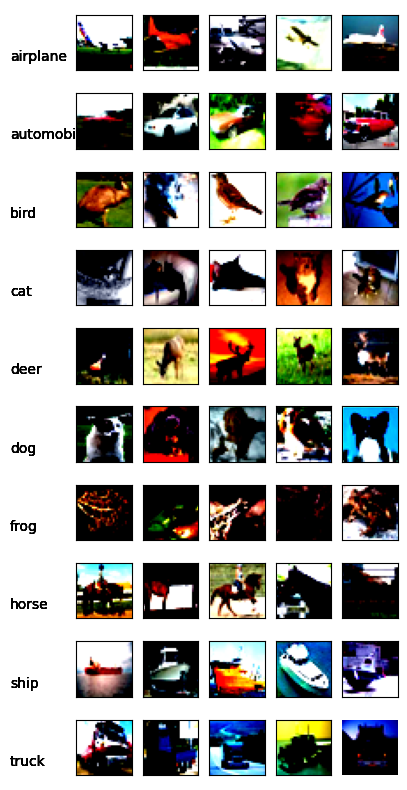

In [4]:
class_image(train_data,classes)

# Group Normalization - Defining the model and printing the model summary

In [5]:
from helper import model_summary
model_GN = Net("GN").to(device)
model_summary(model_GN, input_size=(3, 32, 32))

GN
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
         GroupNorm-2            [-1, 8, 32, 32]              16
           Dropout-3            [-1, 8, 32, 32]               0
              ReLU-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,152
         GroupNorm-6           [-1, 16, 32, 32]              32
           Dropout-7           [-1, 16, 32, 32]               0
              ReLU-8           [-1, 16, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             128
             ReLU-10            [-1, 8, 32, 32]               0
        MaxPool2d-11            [-1, 8, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]           1,152
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1, 

# Defining the optimizer and iterating the train and test functions based on number of epochs

In [6]:
optimizer = optim.SGD(model_GN.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model_GN, device, train_loader, optimizer, epoch)
    missed_images, missed_labels, missed_predictions= test(model_GN, device, test_loader)

EPOCH: 0


Loss=1.9776169061660767 Batch_id=390 Accuracy=24.73: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Test set: Average loss: 1.9658, Accuracy: 3099/10000 (30.99%)

EPOCH: 1


Loss=1.616149663925171 Batch_id=390 Accuracy=38.70: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]



Test set: Average loss: 1.5779, Accuracy: 4558/10000 (45.58%)

EPOCH: 2


Loss=1.3775229454040527 Batch_id=390 Accuracy=48.25: 100%|██████████| 391/391 [00:19<00:00, 20.08it/s]



Test set: Average loss: 1.3337, Accuracy: 5242/10000 (52.42%)

EPOCH: 3


Loss=1.221125841140747 Batch_id=390 Accuracy=53.83: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]



Test set: Average loss: 1.2280, Accuracy: 5632/10000 (56.32%)

EPOCH: 4


Loss=1.1514760255813599 Batch_id=390 Accuracy=57.72: 100%|██████████| 391/391 [00:17<00:00, 21.74it/s]



Test set: Average loss: 1.1439, Accuracy: 5939/10000 (59.39%)

EPOCH: 5


Loss=1.1186093091964722 Batch_id=390 Accuracy=61.08: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]



Test set: Average loss: 1.0720, Accuracy: 6232/10000 (62.32%)

EPOCH: 6


Loss=0.8351677060127258 Batch_id=390 Accuracy=63.90: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]



Test set: Average loss: 1.0476, Accuracy: 6343/10000 (63.43%)

EPOCH: 7


Loss=0.8842666745185852 Batch_id=390 Accuracy=65.92: 100%|██████████| 391/391 [00:17<00:00, 21.95it/s]



Test set: Average loss: 0.9561, Accuracy: 6665/10000 (66.65%)

EPOCH: 8


Loss=0.9084835052490234 Batch_id=390 Accuracy=67.75: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]



Test set: Average loss: 0.9410, Accuracy: 6694/10000 (66.94%)

EPOCH: 9


Loss=0.6832882165908813 Batch_id=390 Accuracy=69.14: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]



Test set: Average loss: 0.8957, Accuracy: 6880/10000 (68.80%)

EPOCH: 10


Loss=0.9070445895195007 Batch_id=390 Accuracy=70.16: 100%|██████████| 391/391 [00:18<00:00, 21.58it/s]



Test set: Average loss: 0.8989, Accuracy: 6908/10000 (69.08%)

EPOCH: 11


Loss=0.6454585790634155 Batch_id=390 Accuracy=71.25: 100%|██████████| 391/391 [00:18<00:00, 21.06it/s]



Test set: Average loss: 0.9030, Accuracy: 6885/10000 (68.85%)

EPOCH: 12


Loss=0.9710585474967957 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:17<00:00, 21.81it/s]



Test set: Average loss: 0.8542, Accuracy: 7049/10000 (70.49%)

EPOCH: 13


Loss=0.6598695516586304 Batch_id=390 Accuracy=73.03: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]



Test set: Average loss: 0.8408, Accuracy: 7137/10000 (71.37%)

EPOCH: 14


Loss=0.6006903052330017 Batch_id=390 Accuracy=73.42: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]



Test set: Average loss: 0.8751, Accuracy: 6980/10000 (69.80%)

EPOCH: 15


Loss=0.5882378816604614 Batch_id=390 Accuracy=74.28: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]



Test set: Average loss: 0.8952, Accuracy: 6894/10000 (68.94%)

EPOCH: 16


Loss=0.7362799048423767 Batch_id=390 Accuracy=74.62: 100%|██████████| 391/391 [00:19<00:00, 20.23it/s]



Test set: Average loss: 0.8134, Accuracy: 7214/10000 (72.14%)

EPOCH: 17


Loss=0.6468611359596252 Batch_id=390 Accuracy=75.13: 100%|██████████| 391/391 [00:18<00:00, 21.02it/s]



Test set: Average loss: 0.8505, Accuracy: 7092/10000 (70.92%)

EPOCH: 18


Loss=0.6514583230018616 Batch_id=390 Accuracy=75.90: 100%|██████████| 391/391 [00:17<00:00, 21.93it/s]



Test set: Average loss: 0.8794, Accuracy: 6998/10000 (69.98%)

EPOCH: 19


Loss=0.5512544512748718 Batch_id=390 Accuracy=76.00: 100%|██████████| 391/391 [00:20<00:00, 19.19it/s]



Test set: Average loss: 0.8371, Accuracy: 7128/10000 (71.28%)



# Plotting train/test accuracies and losses

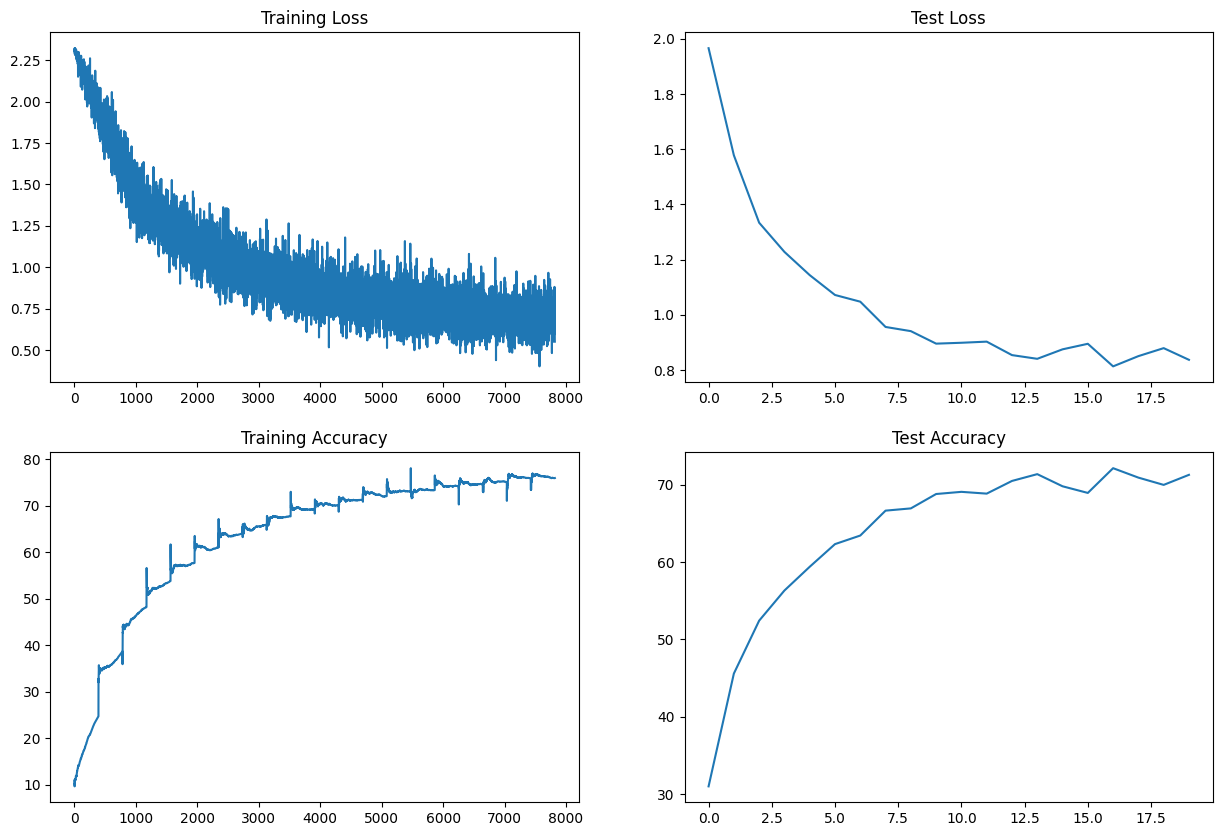

In [7]:
show_accuracy_loss(model.train_losses, model.train_acc, model.test_losses, model.test_acc)

# Plotting miscalssified images after prediction

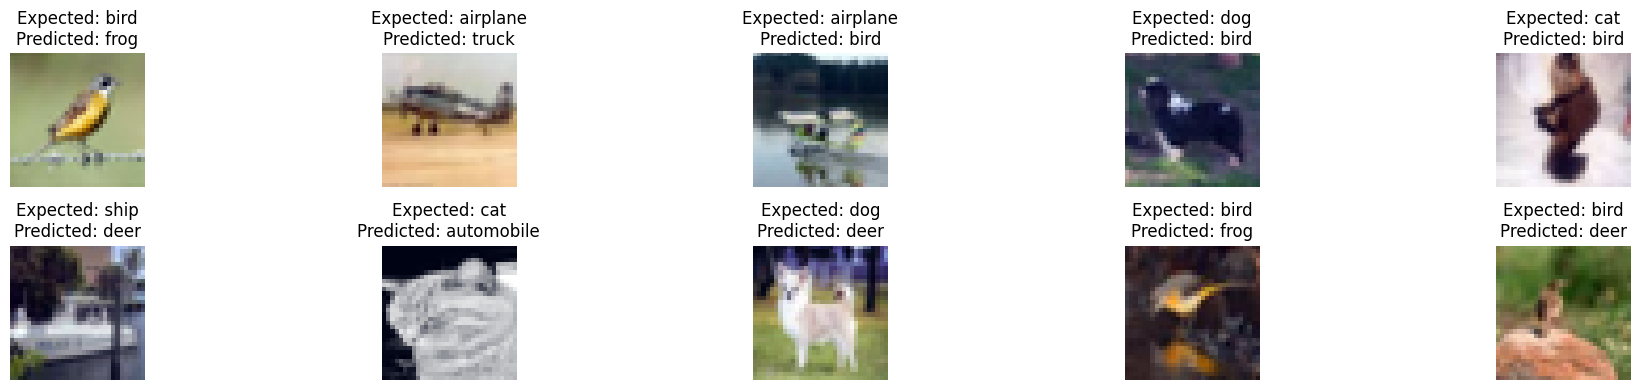

In [8]:
show_misclassified_img(missed_images, missed_labels, missed_predictions, classes)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
GN


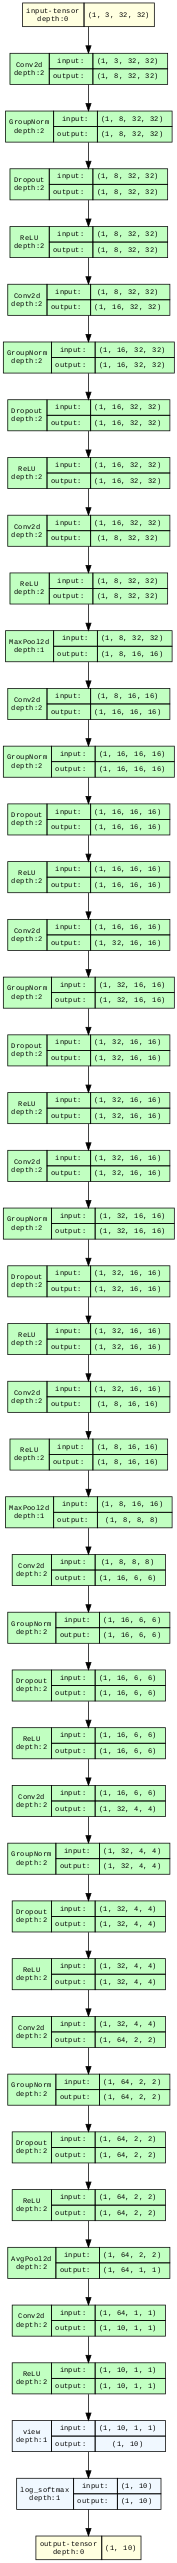

In [9]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net("GN"), input_size=(1,3,32,32), expand_nested=False)
model_graph.visual_graph

# Layer Normalization -Defining the model and printing the model summary


In [10]:
from helper import model_summary
model_LN = Net("LN").to(device)
model_summary(model_LN, input_size=(3, 32, 32))

LN
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
         GroupNorm-2            [-1, 8, 32, 32]              16
           Dropout-3            [-1, 8, 32, 32]               0
              ReLU-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,152
         GroupNorm-6           [-1, 16, 32, 32]              32
           Dropout-7           [-1, 16, 32, 32]               0
              ReLU-8           [-1, 16, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             128
             ReLU-10            [-1, 8, 32, 32]               0
        MaxPool2d-11            [-1, 8, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]           1,152
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1, 

In [11]:
optimizer = optim.SGD(model_LN.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model_LN, device, train_loader, optimizer, epoch)
    missed_images, missed_labels, missed_predictions= test(model_LN, device, test_loader)

EPOCH: 0


Loss=1.7746970653533936 Batch_id=390 Accuracy=28.20: 100%|██████████| 391/391 [00:23<00:00, 17.00it/s]



Test set: Average loss: 1.7685, Accuracy: 3867/10000 (38.67%)

EPOCH: 1


Loss=1.507387399673462 Batch_id=390 Accuracy=40.60: 100%|██████████| 391/391 [00:19<00:00, 20.10it/s]



Test set: Average loss: 1.5517, Accuracy: 4609/10000 (46.09%)

EPOCH: 2


Loss=1.2467175722122192 Batch_id=390 Accuracy=47.07: 100%|██████████| 391/391 [00:19<00:00, 20.36it/s]



Test set: Average loss: 1.4460, Accuracy: 4935/10000 (49.35%)

EPOCH: 3


Loss=1.4209080934524536 Batch_id=390 Accuracy=51.05: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]



Test set: Average loss: 1.3371, Accuracy: 5327/10000 (53.27%)

EPOCH: 4


Loss=1.5973464250564575 Batch_id=390 Accuracy=53.93: 100%|██████████| 391/391 [00:18<00:00, 21.54it/s]



Test set: Average loss: 1.2770, Accuracy: 5549/10000 (55.49%)

EPOCH: 5


Loss=1.250006079673767 Batch_id=390 Accuracy=55.78: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]



Test set: Average loss: 1.2512, Accuracy: 5668/10000 (56.68%)

EPOCH: 6


Loss=0.8853024244308472 Batch_id=390 Accuracy=57.41: 100%|██████████| 391/391 [00:17<00:00, 21.86it/s]



Test set: Average loss: 1.2715, Accuracy: 5598/10000 (55.98%)

EPOCH: 7


Loss=1.197051763534546 Batch_id=390 Accuracy=59.11: 100%|██████████| 391/391 [00:18<00:00, 20.72it/s]



Test set: Average loss: 1.1671, Accuracy: 5872/10000 (58.72%)

EPOCH: 8


Loss=1.145309567451477 Batch_id=390 Accuracy=59.88: 100%|██████████| 391/391 [00:19<00:00, 20.28it/s]



Test set: Average loss: 1.1344, Accuracy: 6043/10000 (60.43%)

EPOCH: 9


Loss=1.4750025272369385 Batch_id=390 Accuracy=61.23: 100%|██████████| 391/391 [00:18<00:00, 21.47it/s]



Test set: Average loss: 1.1646, Accuracy: 5953/10000 (59.53%)

EPOCH: 10


Loss=0.6812565326690674 Batch_id=390 Accuracy=63.75: 100%|██████████| 391/391 [00:19<00:00, 19.98it/s]



Test set: Average loss: 0.9256, Accuracy: 6804/10000 (68.04%)

EPOCH: 11


Loss=0.8172067403793335 Batch_id=390 Accuracy=69.47: 100%|██████████| 391/391 [00:19<00:00, 20.46it/s]



Test set: Average loss: 0.9087, Accuracy: 6817/10000 (68.17%)

EPOCH: 12


Loss=0.7303302884101868 Batch_id=390 Accuracy=70.37: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s]



Test set: Average loss: 0.9432, Accuracy: 6745/10000 (67.45%)

EPOCH: 13


Loss=1.0112016201019287 Batch_id=390 Accuracy=71.69: 100%|██████████| 391/391 [00:18<00:00, 21.39it/s]



Test set: Average loss: 0.9008, Accuracy: 6856/10000 (68.56%)

EPOCH: 14


Loss=0.6871894598007202 Batch_id=390 Accuracy=71.81: 100%|██████████| 391/391 [00:19<00:00, 20.21it/s]



Test set: Average loss: 0.9403, Accuracy: 6787/10000 (67.87%)

EPOCH: 15


Loss=0.8517953753471375 Batch_id=390 Accuracy=72.80: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]



Test set: Average loss: 0.8679, Accuracy: 7029/10000 (70.29%)

EPOCH: 16


Loss=0.7168473601341248 Batch_id=390 Accuracy=73.36: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]



Test set: Average loss: 0.8531, Accuracy: 7097/10000 (70.97%)

EPOCH: 17


Loss=0.7993623614311218 Batch_id=390 Accuracy=74.02: 100%|██████████| 391/391 [00:19<00:00, 20.02it/s]



Test set: Average loss: 0.8499, Accuracy: 7089/10000 (70.89%)

EPOCH: 18


Loss=0.5067593455314636 Batch_id=390 Accuracy=74.26: 100%|██████████| 391/391 [00:18<00:00, 21.08it/s]



Test set: Average loss: 0.8535, Accuracy: 7042/10000 (70.42%)

EPOCH: 19


Loss=0.8217648267745972 Batch_id=390 Accuracy=75.08: 100%|██████████| 391/391 [00:18<00:00, 20.84it/s]



Test set: Average loss: 0.8254, Accuracy: 7167/10000 (71.67%)



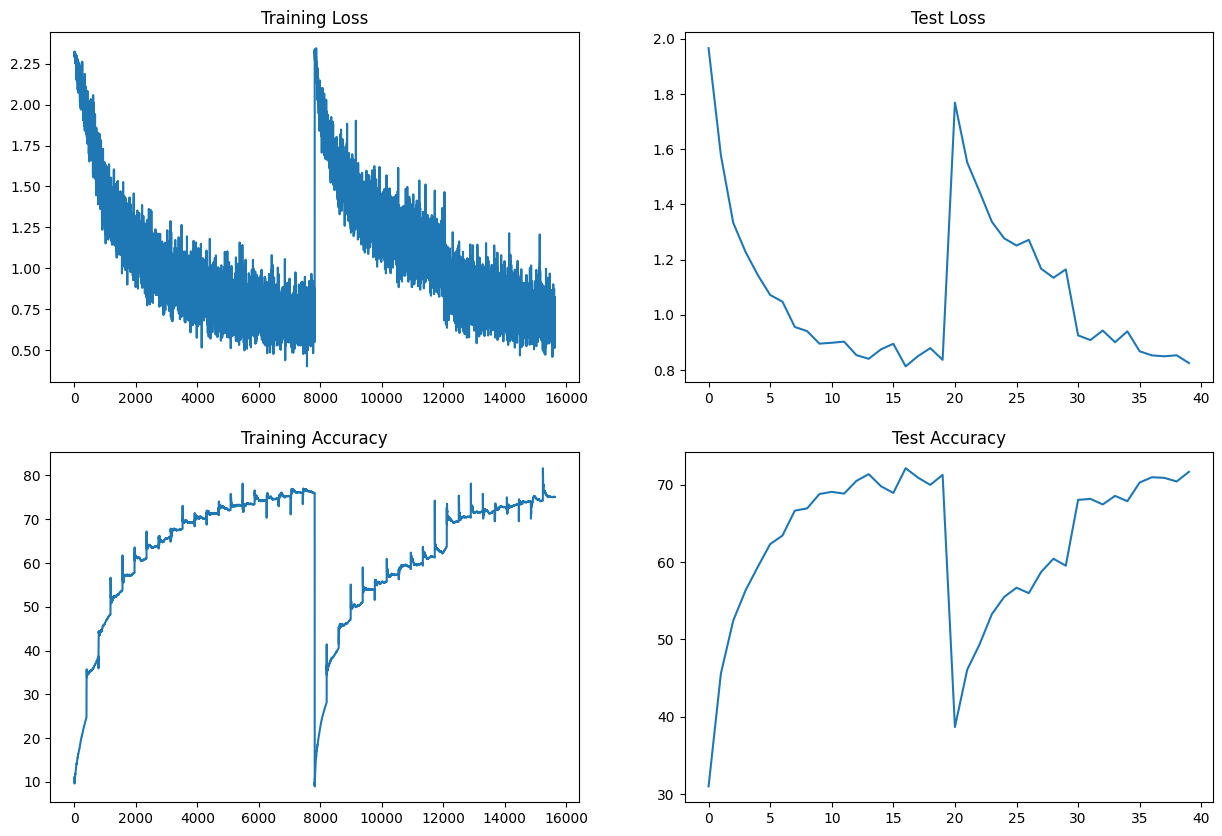

In [12]:
show_accuracy_loss(model.train_losses, model.train_acc, model.test_losses, model.test_acc)

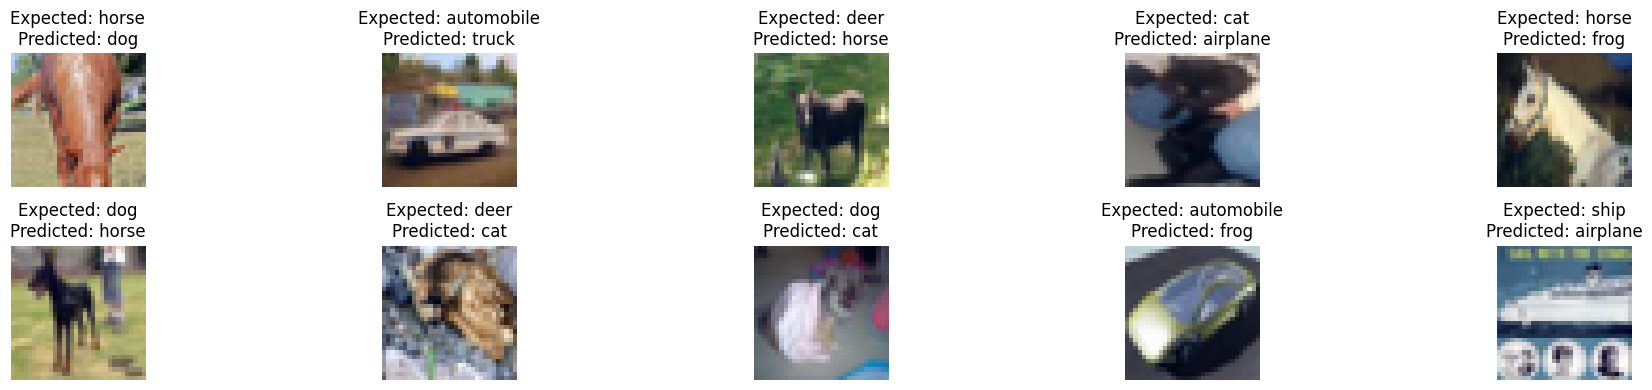

In [13]:
show_misclassified_img(missed_images, missed_labels, missed_predictions, classes)

LN


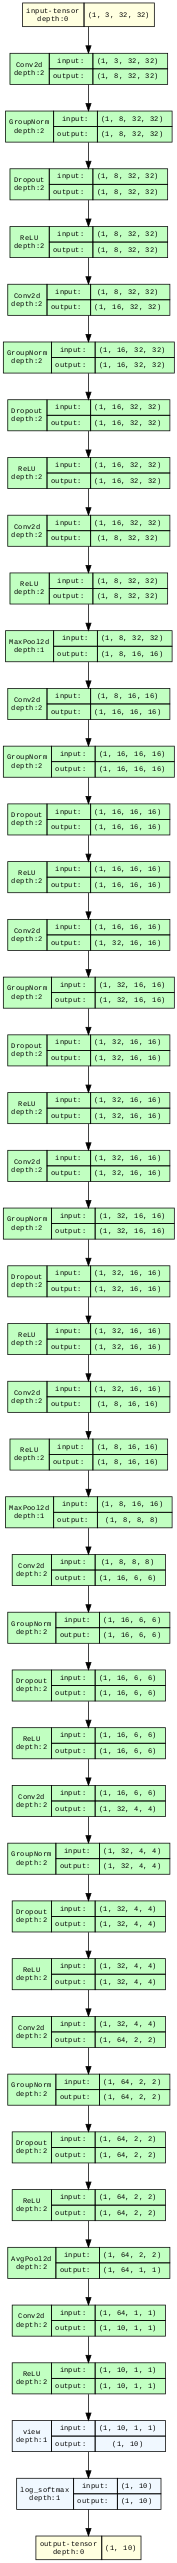

In [14]:
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net("LN"), input_size=(1,3,32,32), expand_nested=False)
model_graph.visual_graph

# Batch Normalization - Defining the model and printing the model summary


In [15]:
from helper import model_summary
model_BN = Net("BN").to(device)
model_summary(model_BN, input_size=(3, 32, 32))

BN
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
       BatchNorm2d-2            [-1, 8, 32, 32]              16
           Dropout-3            [-1, 8, 32, 32]               0
              ReLU-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,152
       BatchNorm2d-6           [-1, 16, 32, 32]              32
           Dropout-7           [-1, 16, 32, 32]               0
              ReLU-8           [-1, 16, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             128
             ReLU-10            [-1, 8, 32, 32]               0
        MaxPool2d-11            [-1, 8, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]           1,152
      BatchNorm2d-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1, 

In [16]:
optimizer = optim.SGD(model_BN.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model_BN, device, train_loader, optimizer, epoch)
    missed_images, missed_labels, missed_predictions= test(model_BN, device, test_loader)

EPOCH: 0


Loss=1.361129879951477 Batch_id=390 Accuracy=44.55: 100%|██████████| 391/391 [00:22<00:00, 17.76it/s]



Test set: Average loss: 1.5313, Accuracy: 4677/10000 (46.77%)

EPOCH: 1


Loss=1.0215704441070557 Batch_id=390 Accuracy=61.32: 100%|██████████| 391/391 [00:18<00:00, 21.09it/s]



Test set: Average loss: 1.0582, Accuracy: 6271/10000 (62.71%)

EPOCH: 2


Loss=0.9359421730041504 Batch_id=390 Accuracy=66.85: 100%|██████████| 391/391 [00:19<00:00, 20.16it/s]



Test set: Average loss: 0.9168, Accuracy: 6741/10000 (67.41%)

EPOCH: 3


Loss=0.5935186743736267 Batch_id=390 Accuracy=69.55: 100%|██████████| 391/391 [00:18<00:00, 21.70it/s]



Test set: Average loss: 0.9586, Accuracy: 6708/10000 (67.08%)

EPOCH: 4


Loss=0.7105644941329956 Batch_id=390 Accuracy=71.91: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]



Test set: Average loss: 0.9065, Accuracy: 6857/10000 (68.57%)

EPOCH: 5


Loss=0.6264125108718872 Batch_id=390 Accuracy=73.84: 100%|██████████| 391/391 [00:19<00:00, 20.18it/s]



Test set: Average loss: 0.8225, Accuracy: 7069/10000 (70.69%)

EPOCH: 6


Loss=0.6928401589393616 Batch_id=390 Accuracy=75.12: 100%|██████████| 391/391 [00:18<00:00, 21.57it/s]



Test set: Average loss: 0.7993, Accuracy: 7262/10000 (72.62%)

EPOCH: 7


Loss=0.5942715406417847 Batch_id=390 Accuracy=76.01: 100%|██████████| 391/391 [00:18<00:00, 21.49it/s]



Test set: Average loss: 0.8409, Accuracy: 7130/10000 (71.30%)

EPOCH: 8


Loss=0.6925584673881531 Batch_id=390 Accuracy=77.07: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]



Test set: Average loss: 0.8009, Accuracy: 7231/10000 (72.31%)

EPOCH: 9


Loss=0.6118693351745605 Batch_id=390 Accuracy=77.54: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]



Test set: Average loss: 0.7622, Accuracy: 7402/10000 (74.02%)

EPOCH: 10


Loss=0.6298171281814575 Batch_id=390 Accuracy=78.52: 100%|██████████| 391/391 [00:18<00:00, 21.69it/s]



Test set: Average loss: 0.7263, Accuracy: 7499/10000 (74.99%)

EPOCH: 11


Loss=0.6286780834197998 Batch_id=390 Accuracy=78.98: 100%|██████████| 391/391 [00:19<00:00, 20.13it/s]



Test set: Average loss: 0.7705, Accuracy: 7398/10000 (73.98%)

EPOCH: 12


Loss=0.5194872617721558 Batch_id=390 Accuracy=79.49: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]



Test set: Average loss: 0.7515, Accuracy: 7452/10000 (74.52%)

EPOCH: 13


Loss=0.5992799997329712 Batch_id=390 Accuracy=80.30: 100%|██████████| 391/391 [00:18<00:00, 21.15it/s]



Test set: Average loss: 0.7276, Accuracy: 7526/10000 (75.26%)

EPOCH: 14


Loss=0.4277018904685974 Batch_id=390 Accuracy=80.41: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]



Test set: Average loss: 0.7050, Accuracy: 7567/10000 (75.67%)

EPOCH: 15


Loss=0.6507417559623718 Batch_id=390 Accuracy=81.09: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s]



Test set: Average loss: 0.7081, Accuracy: 7606/10000 (76.06%)

EPOCH: 16


Loss=0.4932240843772888 Batch_id=390 Accuracy=81.12: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]



Test set: Average loss: 0.7191, Accuracy: 7573/10000 (75.73%)

EPOCH: 17


Loss=0.49909496307373047 Batch_id=390 Accuracy=81.97: 100%|██████████| 391/391 [00:18<00:00, 21.60it/s]



Test set: Average loss: 0.7615, Accuracy: 7450/10000 (74.50%)

EPOCH: 18


Loss=0.5759714245796204 Batch_id=390 Accuracy=82.02: 100%|██████████| 391/391 [00:17<00:00, 22.07it/s]



Test set: Average loss: 0.7018, Accuracy: 7638/10000 (76.38%)

EPOCH: 19


Loss=0.52093905210495 Batch_id=390 Accuracy=82.31: 100%|██████████| 391/391 [00:18<00:00, 20.89it/s]



Test set: Average loss: 0.6996, Accuracy: 7647/10000 (76.47%)



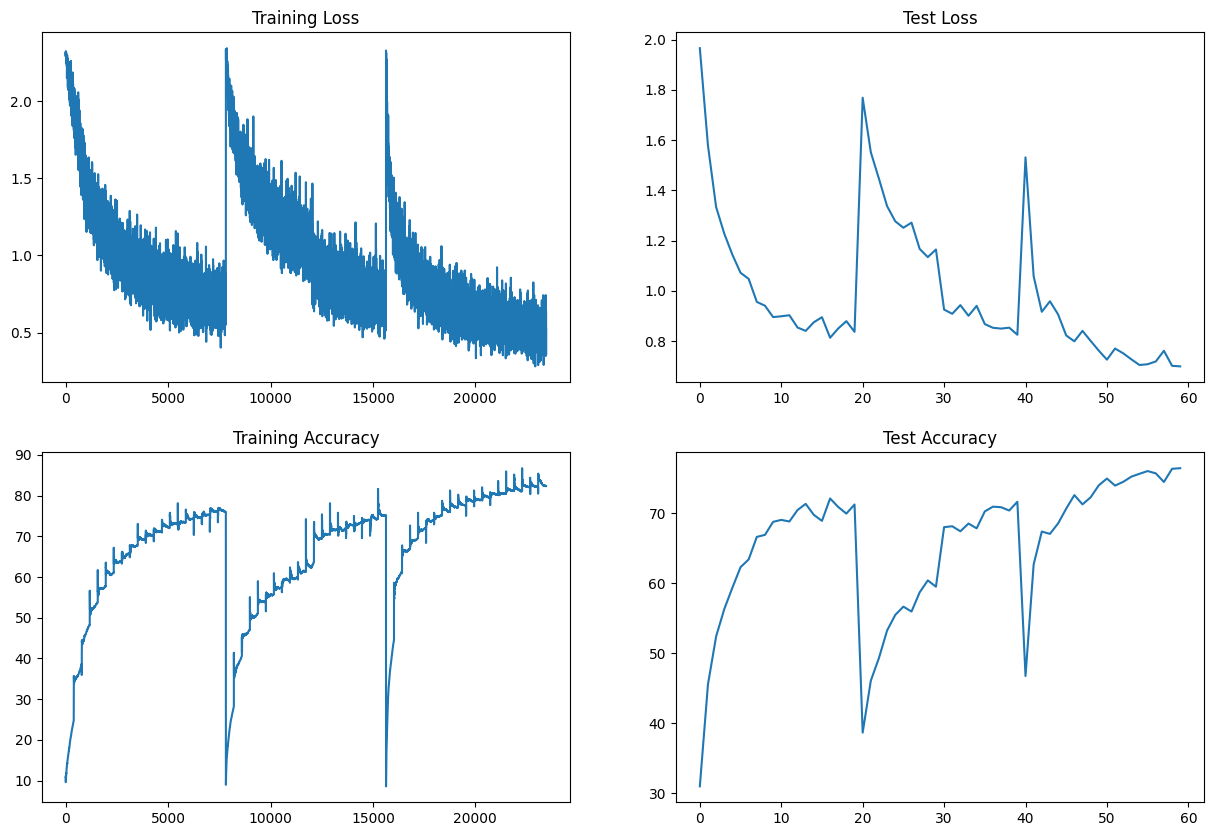

In [17]:
show_accuracy_loss(model.train_losses, model.train_acc, model.test_losses, model.test_acc)

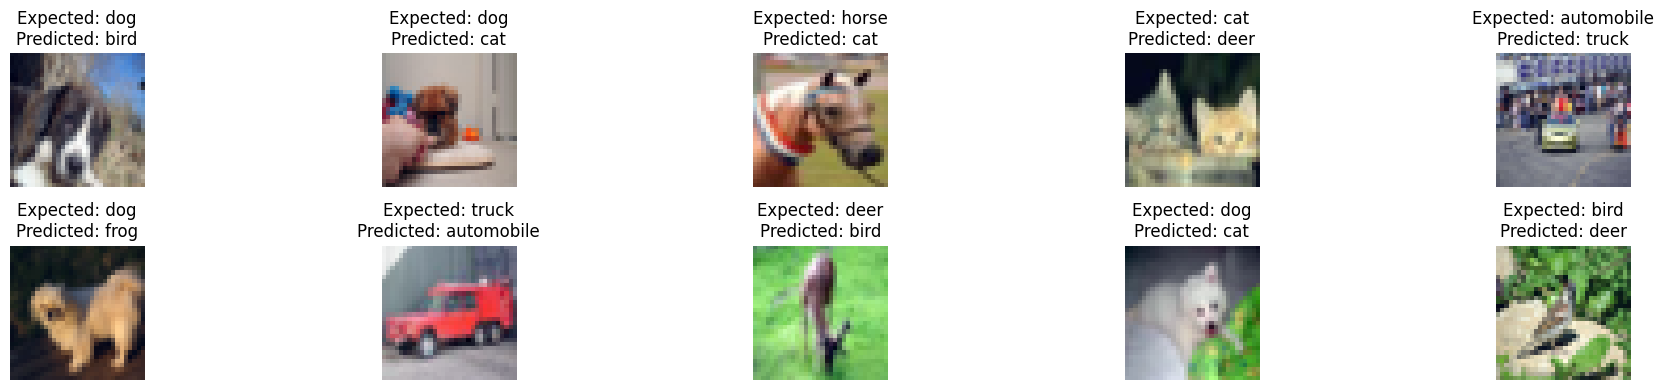

In [18]:
show_misclassified_img(missed_images, missed_labels, missed_predictions, classes)

BN


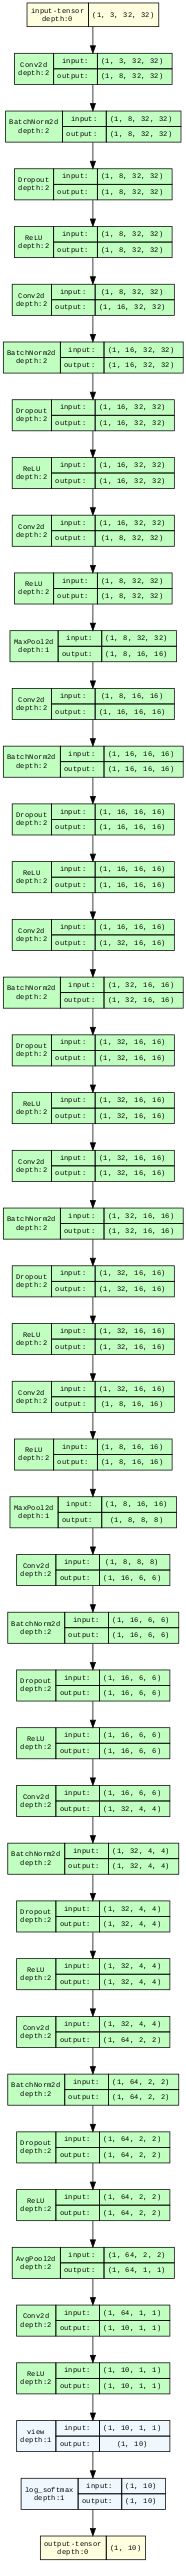

In [19]:
graphviz.set_jupyter_format('png')
model_graph = draw_graph(Net("BN"), input_size=(1,3,32,32), expand_nested=False)
model_graph.visual_graph